# EE4375: Fourth Lab Session Extensions: Eddy Current Problem 

This notebook has as goals to extend previous work to eddy-current problems.

## Import Packages

In [2]:
using LinearAlgebra
using StructArrays
using StaticArrays
using DifferentialEquations
using BoundaryValueDiffEq
using Plots
using LaTeXStrings
using SparseArrays
using BenchmarkTools 

In [2]:
using Logging: global_logger
using TerminalLoggers: TerminalLogger
global_logger(TerminalLogger())

Logging.ConsoleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(45) open, 0 bytes waiting))), Info, Logging.default_metafmt, true, 0, Dict{Any, Int64}())

## Section 1/: Introduction 

## Section 2:/ Spatial Discretization using FEM

### Section 1.2/ Using dsolve to generate reference solutions 

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


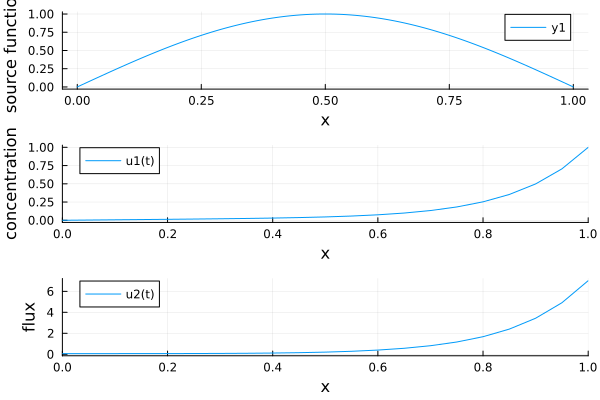

In [3]:
# solves the scalar diffusion equatiobn -d^2/dx^2 u(x) = f(x)
# on the interval 0 < x < 1 
# supplied with Dirichlet or Neumann boundary conditions 

# define spatial range 
xspan = (0.0, 1)

# define the source function f(x)
function sourceFct(x)
    return sin(π*x) 
end

# define diffusion equation 
function diffusion!(du, u, p, x)
    # u[1]: concentration 
    # u[2]: fluc 
    # d/dx(concentration)  = flux 
    du[1] = u[2]
    # d/dx(flux)  = sourceFct
    du[2] = p[1]*u[1] - sourceFct(x)
end

# define boundary conditions 
function boundaries!(residual, u, p, x)
    # residual boundary condition in the left end-point 
    residual[1] = u[1][1] 
    # residual boundary condition in the left end-point
    residual[2] = u[end][1]-1. 
end 

# set the boundary value problem to solve 
p = [50.]; 
bvp1 = BVProblem(diffusion!, boundaries!, [1., 1.], xspan,p)

# set the boundary value problem  
sol1 = solve(bvp1, GeneralMIRK4(), dt = 0.05)

# plot the computed solution
xvec = Vector(xspan[1]:(xspan[2]-xspan[1])/100:xspan[2])
fvec = sourceFct.(xvec)
p1 = plot(xvec,fvec)
xlabel!("x") 
ylabel!("source function")

p2 = plot(sol1, idxs = (1))
xlabel!("x") 
ylabel!("concentration")

p3 = plot(sol1, idxs = (2))
xlabel!("x") 
ylabel!("flux")

plot(p1,p2,p3,layout=(3,1))